#### Data Details: https://www.kaggle.com/uciml/mushroom-classification/data

In [2]:
%matplotlib inline
import matplotlib.pylab as pylab
import csv
import math
import numpy as np
import collections
import heapq
from collections import Counter

from random import randint
import random

import os 
import csv
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif

from sklearn import preprocessing

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB



In [17]:
%matplotlib inline
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

In [40]:
filename = 'mushrooms.csv'
dir_path = os.path.dirname(os.path.realpath('__file__'))
filepath = dir_path + '/' + filename        
#reads csv file in pandas dataframe        
df = pd.read_csv(filepath)
df.columns

Index([u'class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'ring-number', u'ring-type', u'spore-print-color',
       u'population', u'habitat'],
      dtype='object')

In [41]:
df['class'].value_counts().sum()

8124

In [42]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    


In [14]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [15]:
#since column "veil-type" is 0 
df=df.drop(["veil-type"],axis=1)


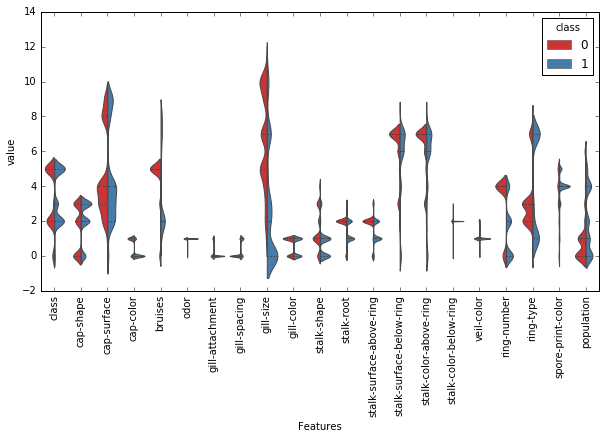

In [18]:
df_div = pd.melt(df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Features", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
p.set_xticklabels(rotation = 90, labels = list(df.columns));

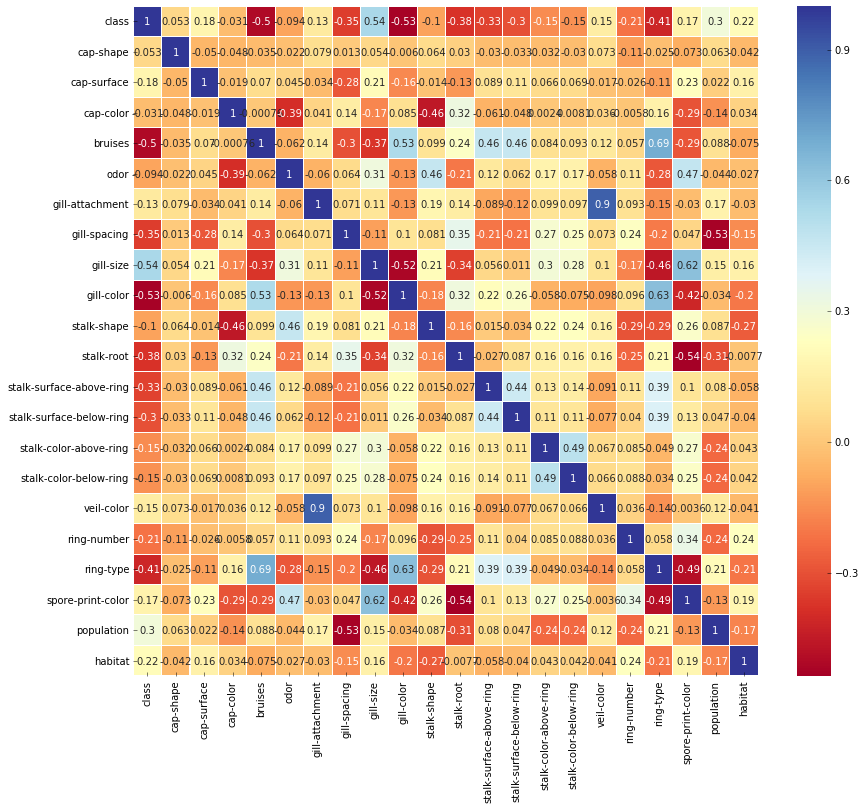

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="RdYlBu", annot=True)
plt.yticks(rotation=0);

In [21]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


/Users/jvalin/anaconda/lib/python2.7/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


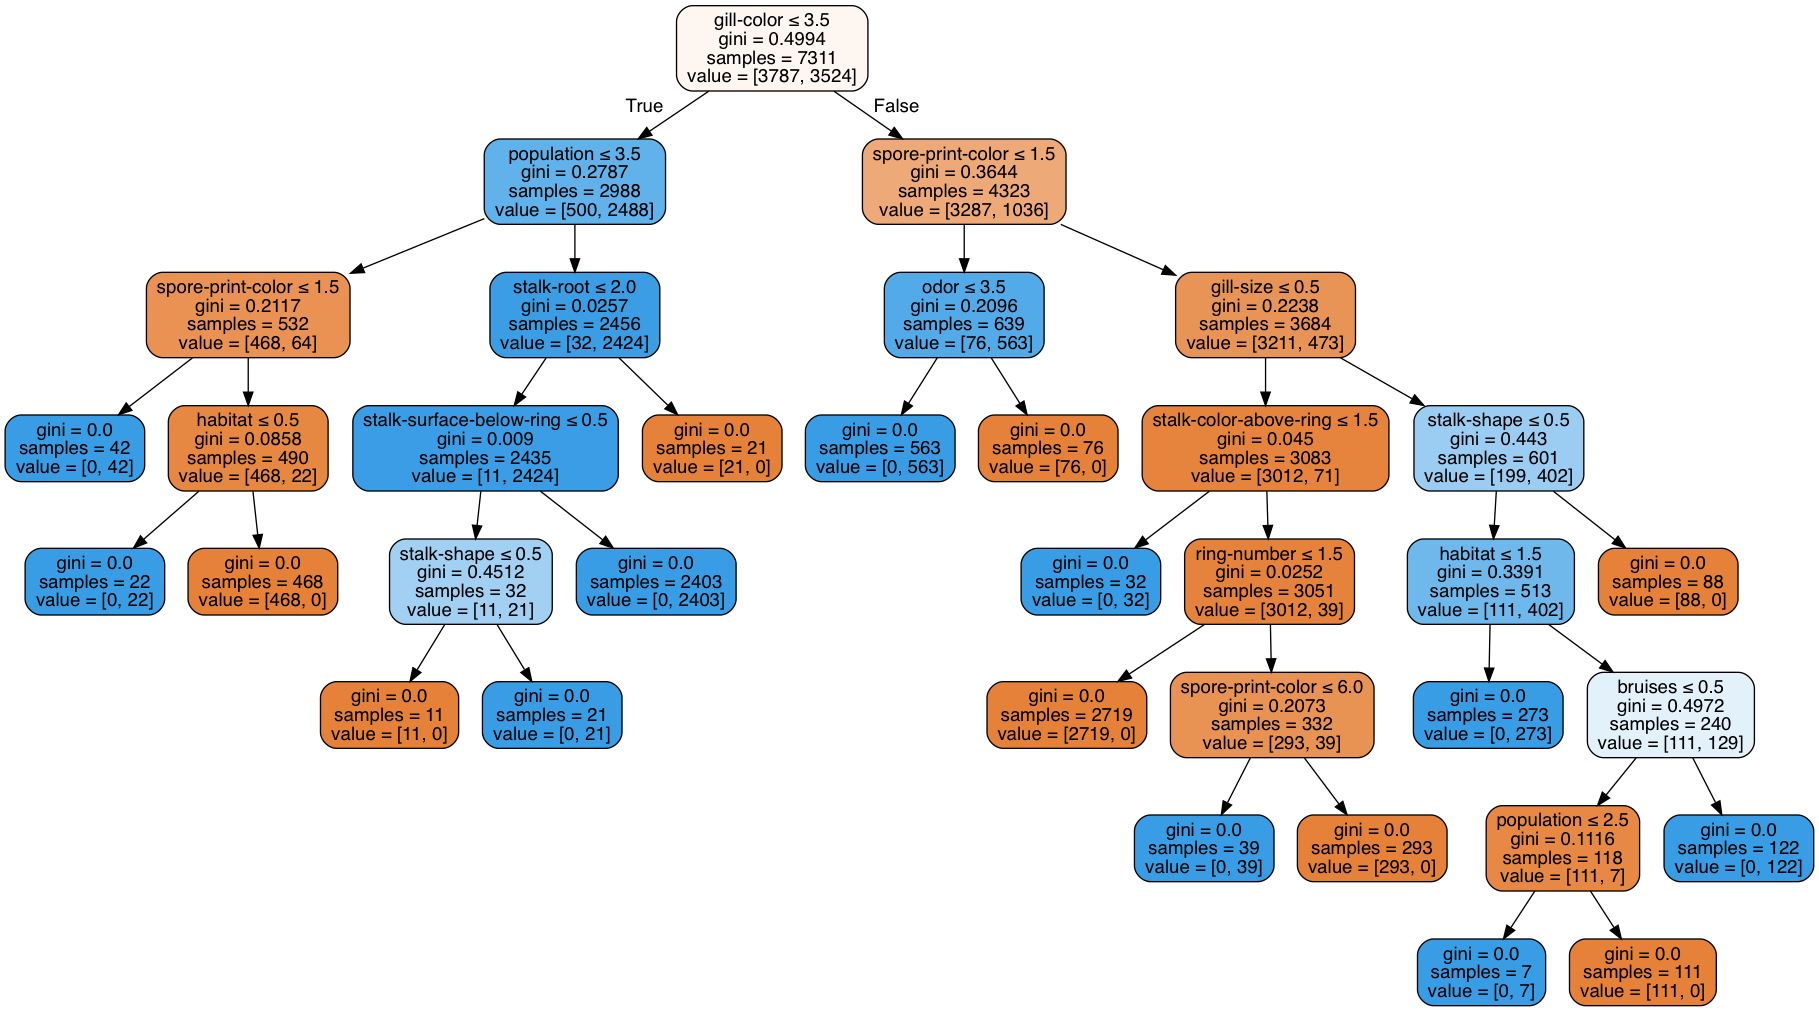

In [28]:
#features
X=df.drop(['class'], axis=1)

#labels
Y=df['class']

X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=29)

#entropy based decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=list(X))

export_graphviz(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

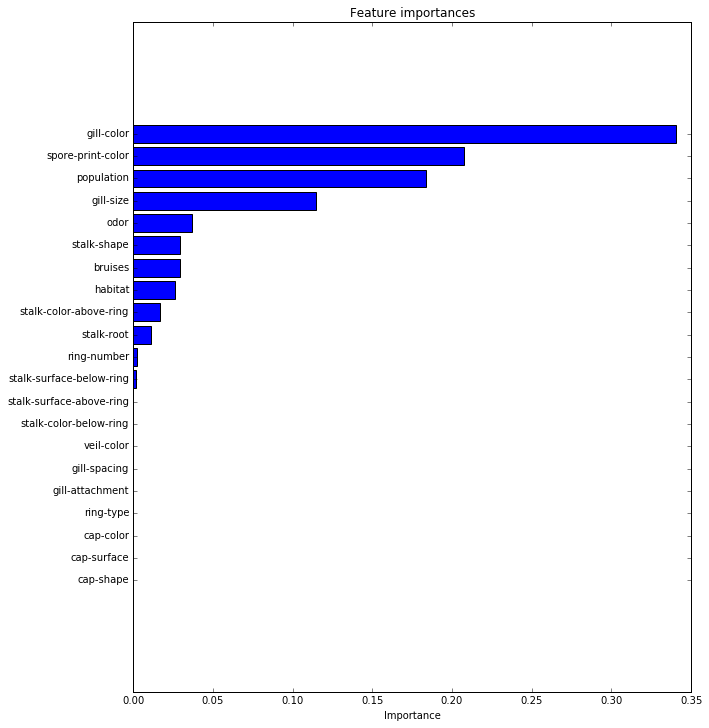

In [30]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(10,12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

Accuracy on splitted test data: 100.0 percent
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       421
          1       1.00      1.00      1.00       392

avg / total       1.00      1.00      1.00       813



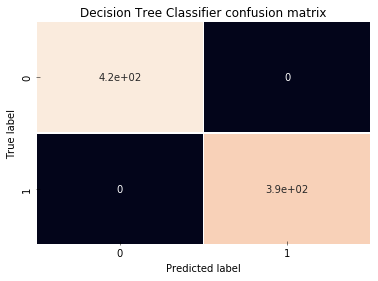

In [36]:
resultset = clf.predict(X_test)
print 'Accuracy on splitted test data: %s percent' % (accuracy_score(Y_test, resultset)*100)
    
#classification report
print(classification_report(Y_test, resultset))

cfm=confusion_matrix(Y_test, resultset)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

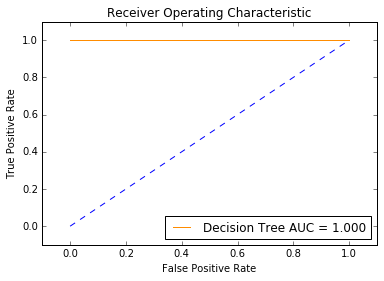

In [35]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, resultset, "Decision Tree")

##### Decision Tree is overfitting so trying Gaussian Naive Bayes

Accuracy on splitted test data: 90.7749077491 percent
             precision    recall  f1-score   support

          0       0.91      0.91      0.91       421
          1       0.90      0.91      0.90       392

avg / total       0.91      0.91      0.91       813



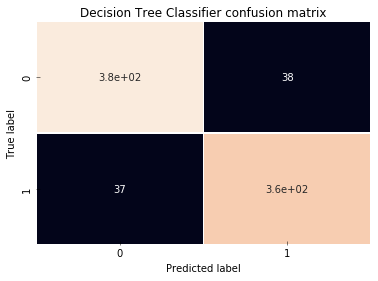

In [37]:
clf = GaussianNB()
clf = clf.fit(X_train, Y_train)


resultset_nb = clf.predict(X_test)
print 'Accuracy on splitted test data: %s percent' % (accuracy_score(Y_test, resultset_nb)*100)
    
#classification report
print(classification_report(Y_test, resultset_nb))

cfm=confusion_matrix(Y_test, resultset_nb)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

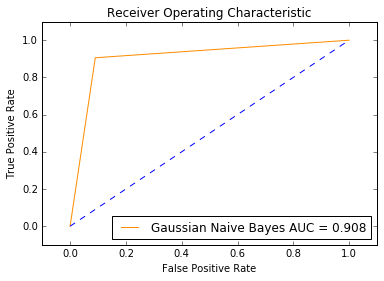

In [38]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, resultset, "Gaussian Naive Bayes")

#### Building mushroom classifier using NaiveBayes -- Program Name: mushroomprediction.py